## Examining the labels from tasso for DP1

In [71]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [44]:
df_labels = pd.read_csv('classifications_13e240890d1341d597b3c1b7a7af00de.csv')

In [38]:
df_diasources = pd.read_csv('diasources_sampled.csv').drop('Unnamed: 0', axis=1)

In [60]:
df_uploads = pd.read_csv('uploads_sampled.csv').drop('Unnamed: 0', axis=1)

In [39]:
df_labels.head()

classification_id                        subject_id  \
0  22acaa5253e1488d86faf5b1bed24b6c  b3de8b3bd7a44459b8da99742aeac95b   
1  44f63e91216d4cf294ba458cc83cfbc9  9319a5ef6ef944f4bf9e4661d11eb35c   
2  1f440db8c2d5448b82e8be181fce66ce  9bad4a03d75443edb85bd62a6cf99727   
3  3baea8f605e24e22af546c642f829b83  9c7bff60d43442bfa3ac8df5b07d1a5c   
4  f80896e95f7b409eac82ed8d070e6108  4fca66166c2646ffa308eea3973bf90a   

                             run_id    user  label_id       label_text  \
0  13e240890d1341d597b3c1b7a7af00de  ebellm         9  bad-subtraction   
1  13e240890d1341d597b3c1b7a7af00de  ebellm         9  bad-subtraction   
2  13e240890d1341d597b3c1b7a7af00de  ebellm         9  bad-subtraction   
3  13e240890d1341d597b3c1b7a7af00de  ebellm         7            noise   
4  13e240890d1341d597b3c1b7a7af00de  ebellm         2           dipole   

   comment  flags                time_labeled       dia_source_id  
0      NaN      0  2025-03-11 04:12:15.563+00  191825232082763912  
1      NaN      0  2025-03-11 04:15:08.966+00  191403230062706727  
2      NaN      0  2025-03-11 05:38:26.916+00  191579050999808058  
3      NaN      0  2025-03-11 14:21:05.643+00  191649489545593043  
4      NaN      0  2025-03-11 14:35:40.611+00  191896086154051711

In [40]:
df_diasources.head()

diaSourceId          visit  detector band  diaObjectId  ssObjectId  \
0  191825304036048961  2024120500100         8    i            0           0   
1  191684665315164248  2024120100192         4    g            0           0   
2  191227175075053585  2024111800105         7    z            0           0   
3  191649397207991194  2024113000114         8    g            0           0   
4  191860411098727818  2024120600028         8    r            0           0   

   parentDiaSourceId  midpointMjdTai  bboxSize              time_processed  \
0                  0    60650.223401        12  2025-03-03 03:29:57.084365   
1                  0    60646.092039        22  2025-03-03 03:03:52.345056   
2                  0    60633.109623        16  2025-03-03 03:12:15.700283   
3                  0    60645.062864       131  2025-03-03 03:44:36.564396   
4                  0    60651.059055        18  2025-03-03 03:43:49.796925   

   ...  pixelFlags_streakCenter  pixelFlags_injected  \
0  ...                    False                False   
1  ...                    False                False   
2  ...                    False                False   
3  ...                    False                False   
4  ...                    False                False   

   pixelFlags_injectedCenter  pixelFlags_injected_template  \
0                      False                         False   
1                      False                         False   
2                      False                         False   
3                      False                         False   
4                      False                         False   

   pixelFlags_injected_templateCenter  pixelFlags_nodata  \
0                               False              False   
1                               False              False   
2                               False              False   
3                               False              False   
4                               False              False   

   pixelFlags_nodataCenter  instrument   day_obs  physical_filter  
0                    False  LSSTComCam  20241205             i_06  
1                    False  LSSTComCam  20241201             g_01  
2                    False  LSSTComCam  20241118             z_03  
3                    False  LSSTComCam  20241130             g_01  
4                    False  LSSTComCam  20241206             r_03  

[5 rows x 88 columns]

In [61]:
df_uploads.head()

diaSourceId                                         local_path  \
0  191825304036048961  /sdf/group/rubin/shared/notebooks/real_bogus/c...   
1  191684665315164248  /sdf/group/rubin/shared/notebooks/real_bogus/c...   
2  191227175075053585  /sdf/group/rubin/shared/notebooks/real_bogus/c...   
3  191649397207991194  /sdf/group/rubin/shared/notebooks/real_bogus/c...   
4  191860411098727818  /sdf/group/rubin/shared/notebooks/real_bogus/c...   

                               relative_path  \
0  191825304036040000/191825304036048961.png   
1  191684665315160000/191684665315164248.png   
2  191227175075050000/191227175075053585.png   
3  191649397207990000/191649397207991194.png   
4  191860411098720000/191860411098727818.png   

                                              dataId  
0  {instrument: 'LSSTComCam', detector: 8, visit:...  
1  {instrument: 'LSSTComCam', detector: 4, visit:...  
2  {instrument: 'LSSTComCam', detector: 7, visit:...  
3  {instrument: 'LSSTComCam', detector: 8, visit:...  
4  {instrument: 'LSSTComCam', detector: 8, visit:...

In [77]:
df = pd.merge(df_labels, df_diasources, left_on='dia_source_id', right_on='diaSourceId')
df = pd.merge(df, df_uploads, on='diaSourceId', how='left')

In [78]:
len(df)

6816

In [82]:
df['label_text'].value_counts()

label_text
bad-subtraction      2149
noise                1557
dipole                839
real-variable         605
bogus                 524
diffraction-spike     442
unsure                380
real-transient        128
cosmic                126
trail                  64
real_transient          2
Name: count, dtype: int64

In [65]:
reals = ['real-transient', 'trail', 'real-variable']
boguses = ['bad-subtraction', 'noise', 'bogus', 'diffraction-spike']
uncertain = ['dipole', 'unsure']

In [ ]:
#

In [53]:
# these are bad classifications I should remove
df.loc[df['label_text'] == 'real_transient', 'classification_id']

861     e774bf2239964437ac6bab632ec8e3a5
6814    2fa15943453d49fc8f34fe0267379aba
Name: classification_id, dtype: object

In [73]:
w_transient = df['label_text'] == 'real-transient'
w_variable = df['label_text'] == 'real-variable'
w_cosmic = df['label_text'] == 'cosmic'
w_trail = df['label_text'] == 'trail'

In [66]:

w_real = df['label_text'].apply(lambda x: x in reals)
w_bogus = df['label_text'].apply(lambda x: x in boguses)
w_uncertain = df['label_text'].apply(lambda x: x in uncertain)
n_real = np.sum(w_real)
n_bogus = np.sum(w_bogus)
n_uncertain = np.sum(w_uncertain)
print(n_real, n_bogus, n_uncertain)

797 4672 1219


In [67]:
n_real/n_bogus

np.float64(0.17059075342465754)

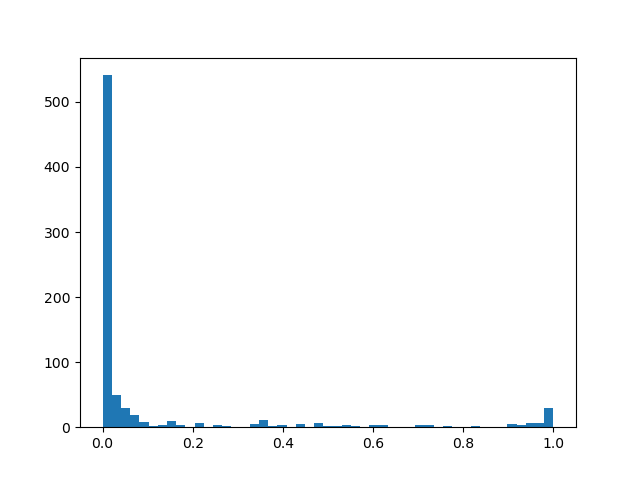

In [68]:
plt.figure()
_ = plt.hist(df.loc[w_real, 'reliability'], label='real', bins=np.linspace(0,1,50))

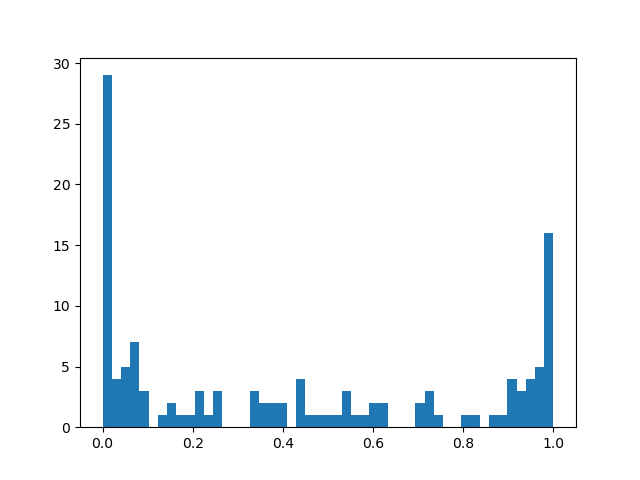

In [69]:
plt.figure()
_ = plt.hist(df.loc[w_transient, 'reliability'], label='real', bins=np.linspace(0,1,50))

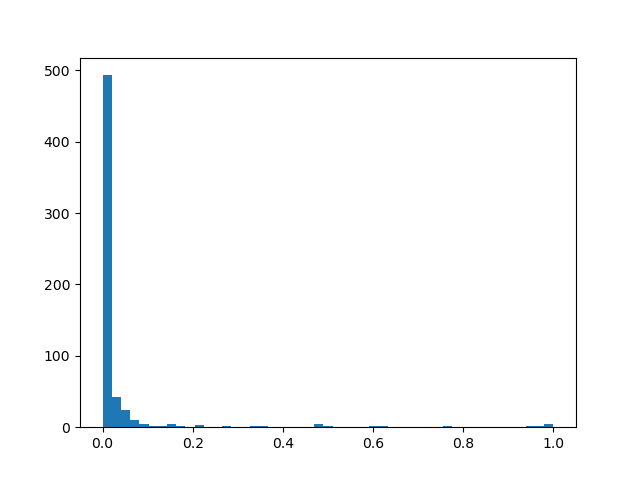

In [70]:
plt.figure()
_ = plt.hist(df.loc[w_variable, 'reliability'], label='real', bins=np.linspace(0,1,50))

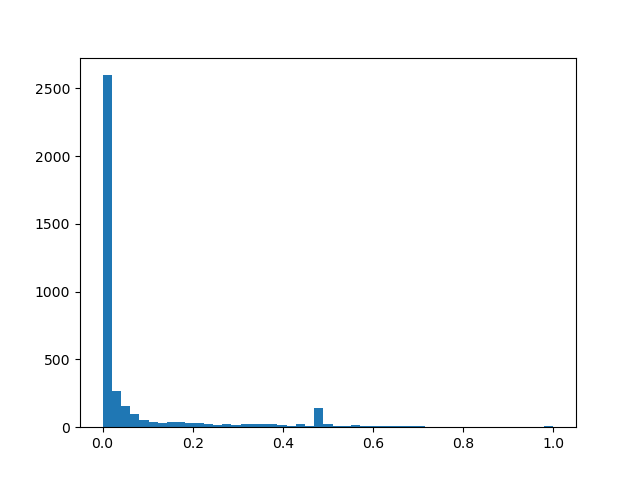

In [33]:
_ = plt.hist(df.loc[w_bogus, 'reliability'], label='bogus', bins=np.linspace(0,1,50))


### Cosmic Rays

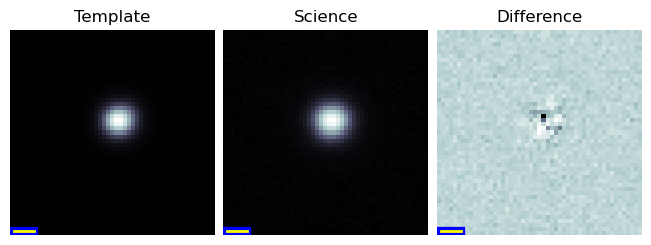

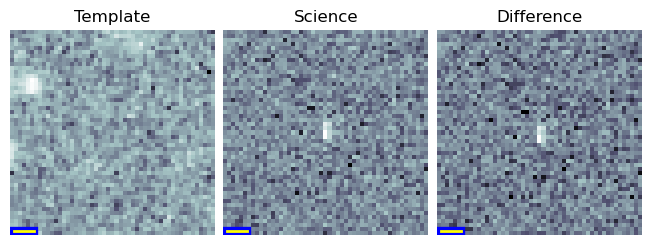

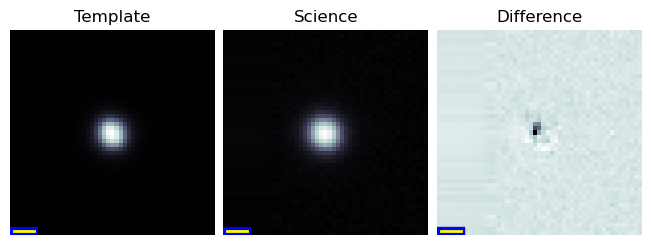

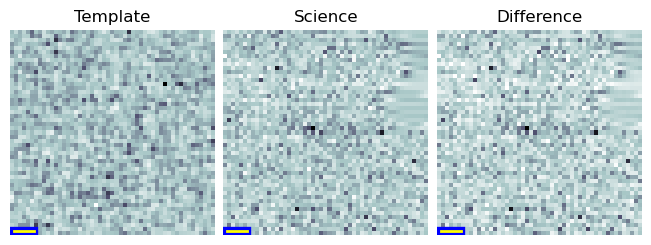

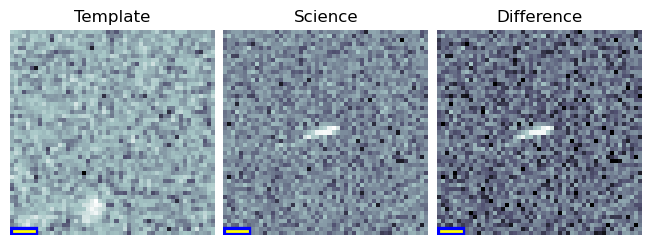

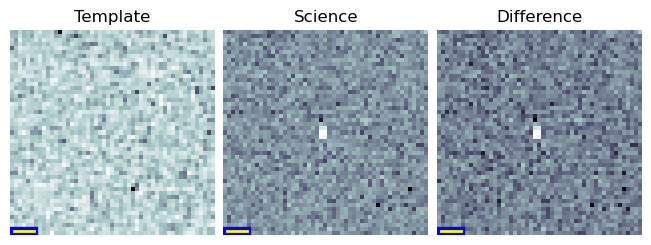

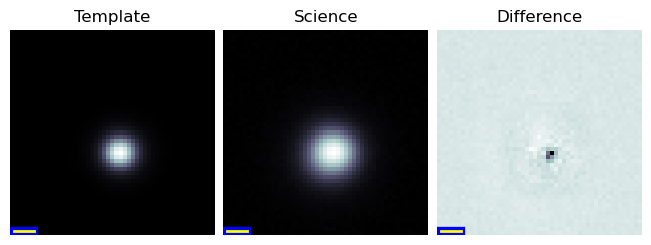

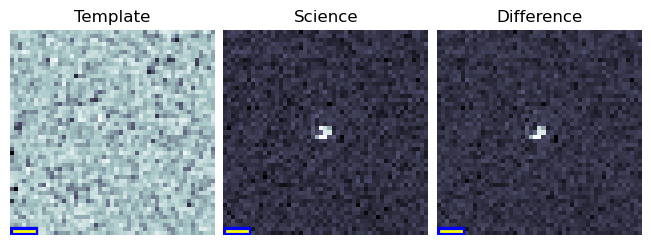

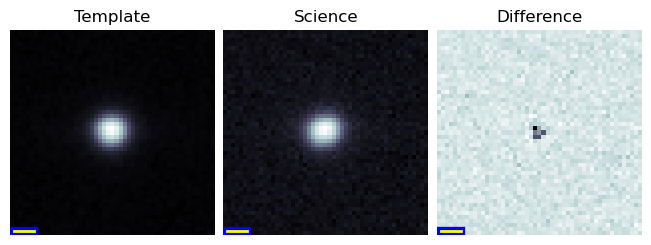

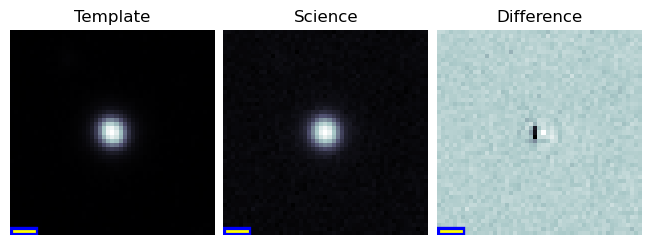

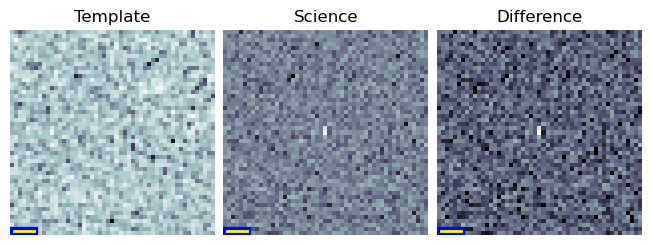

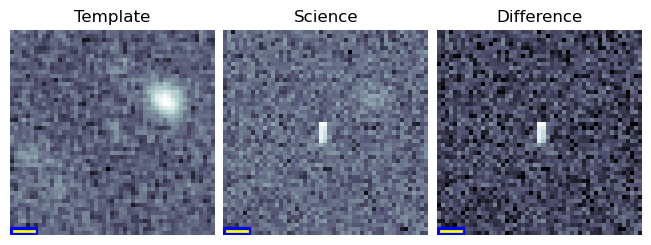

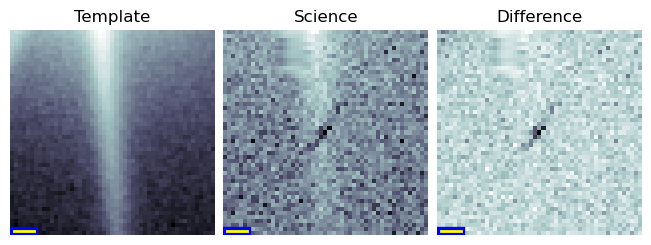

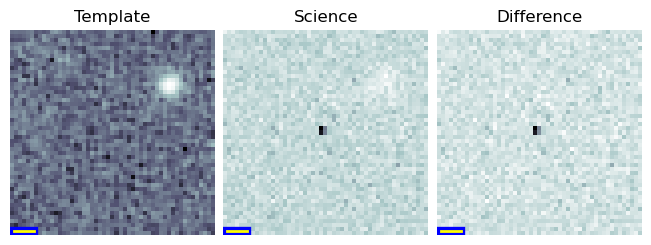

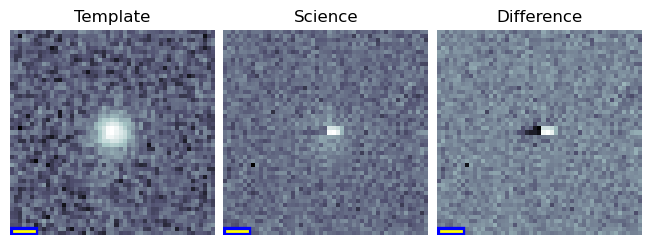

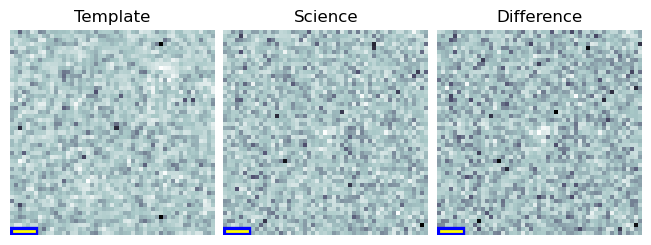

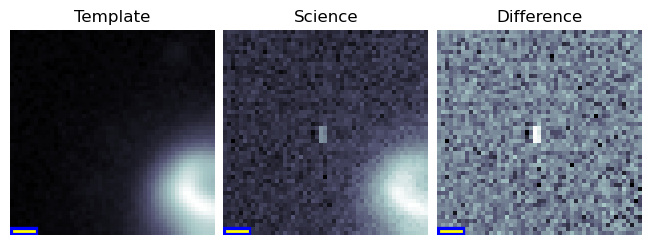

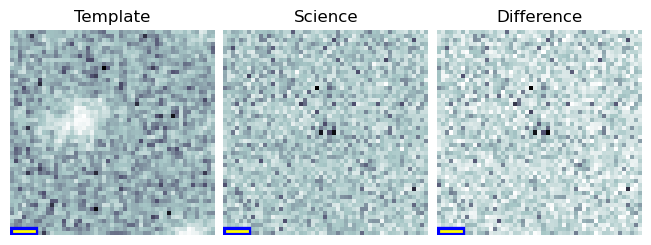

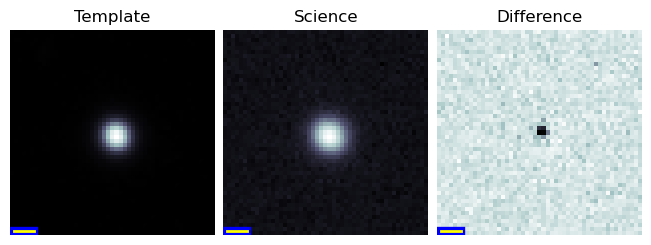

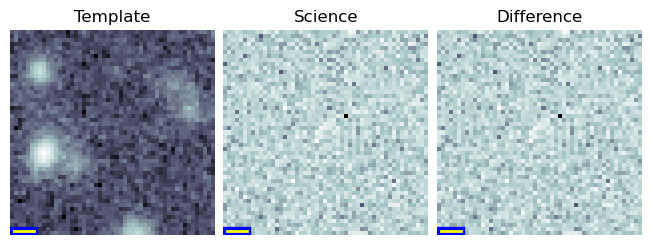

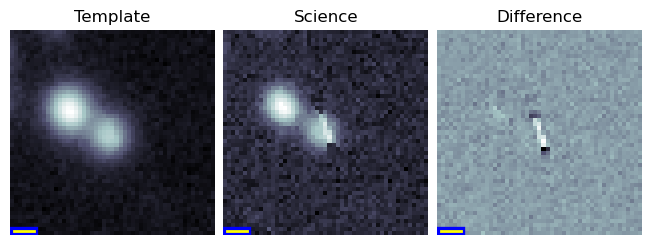

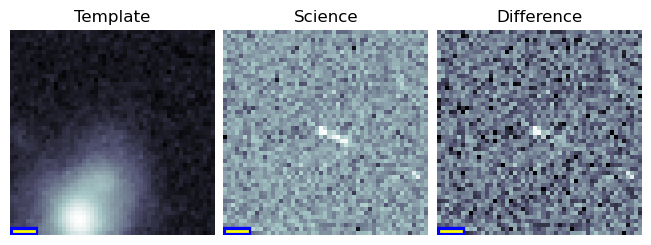

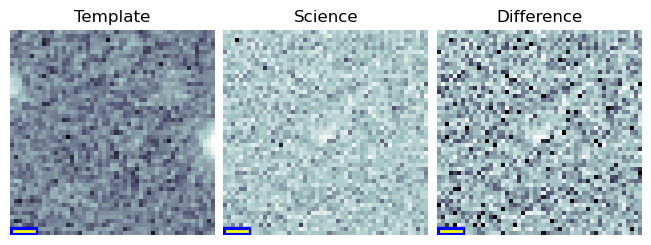

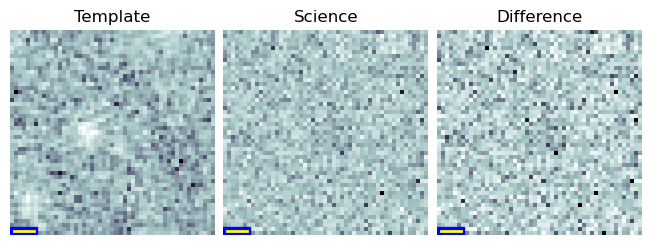

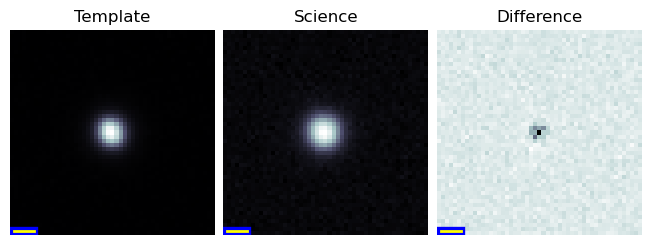

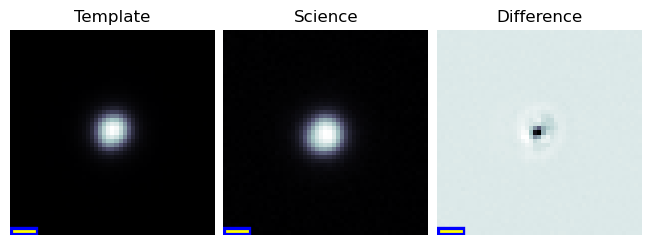

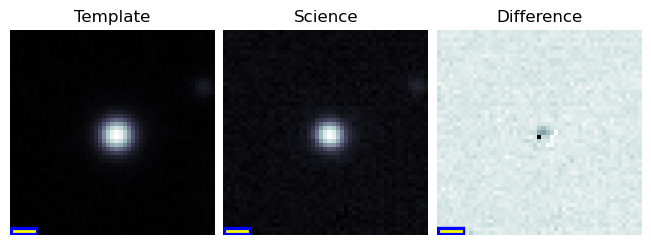

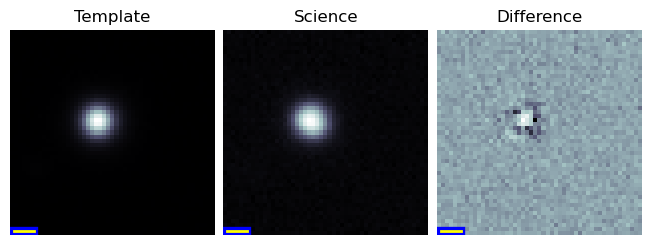

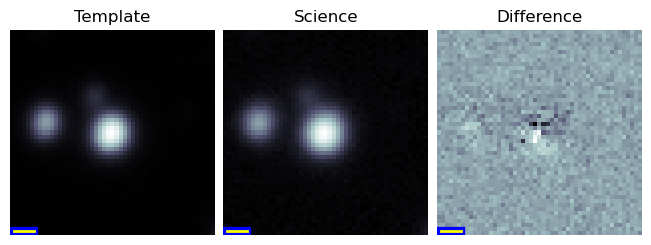

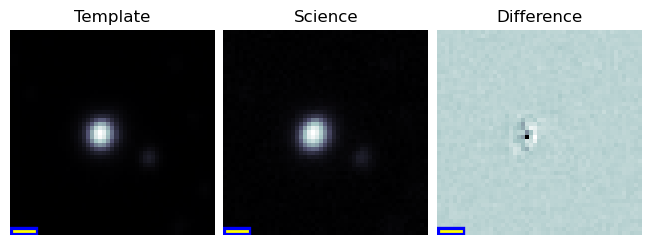

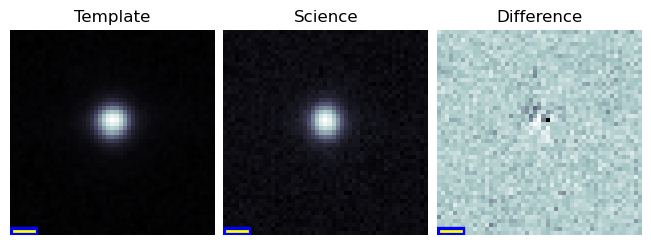

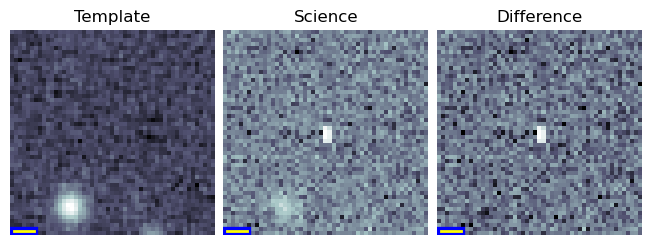

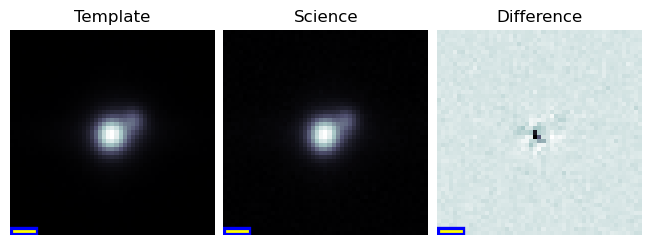

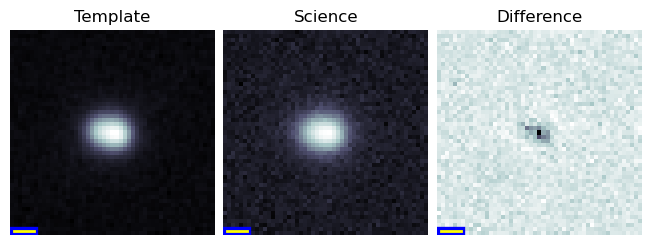

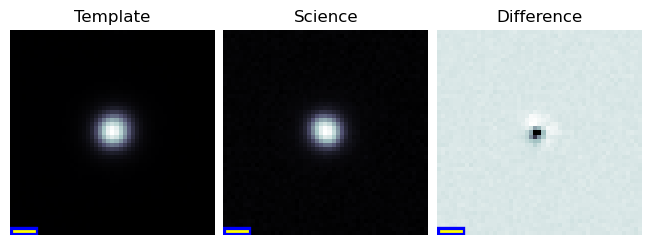

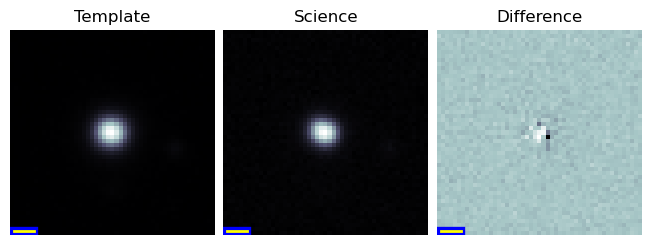

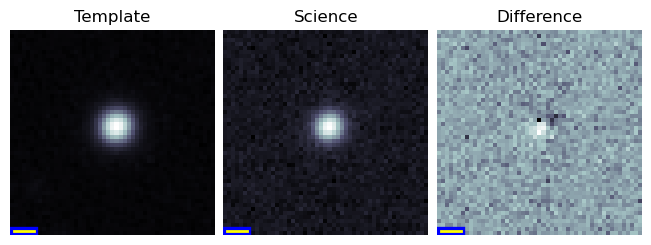

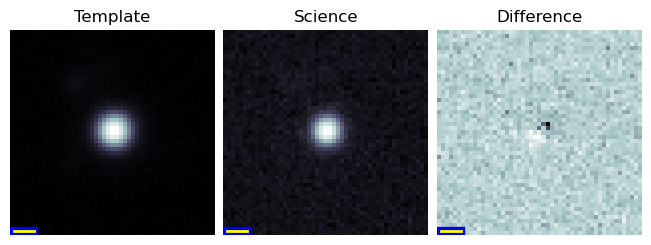

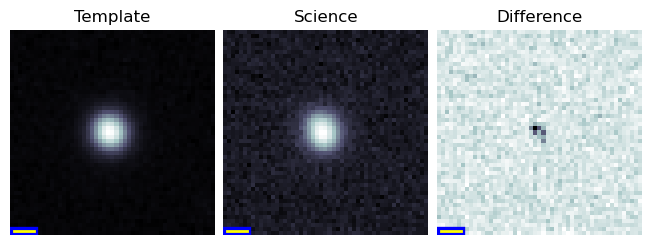

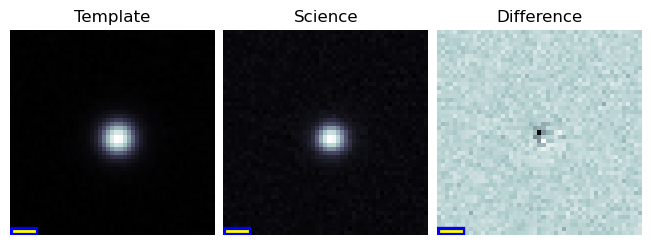

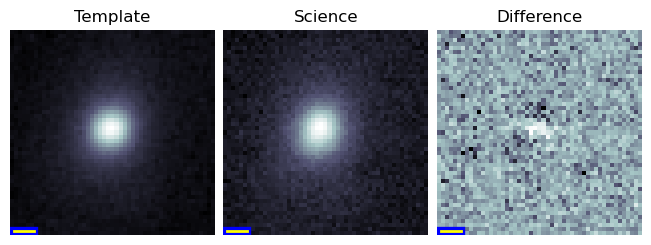

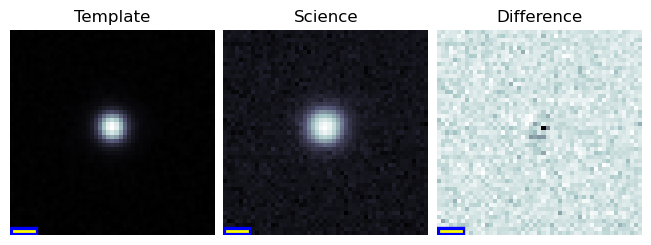

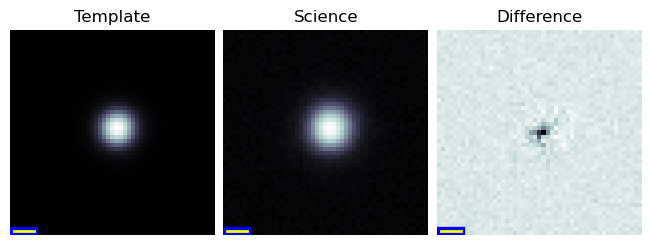

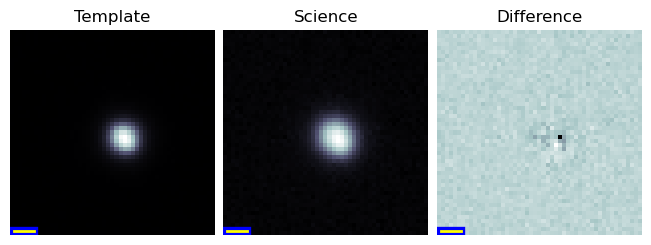

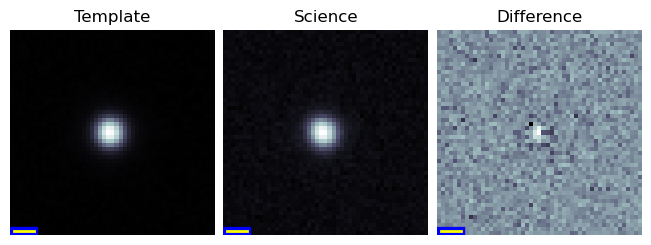

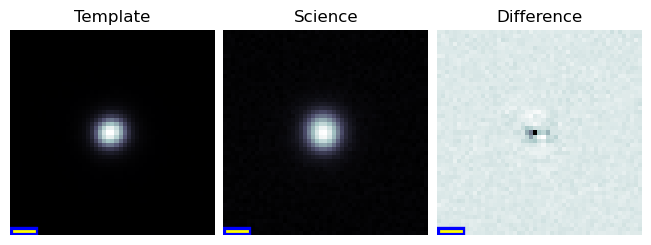

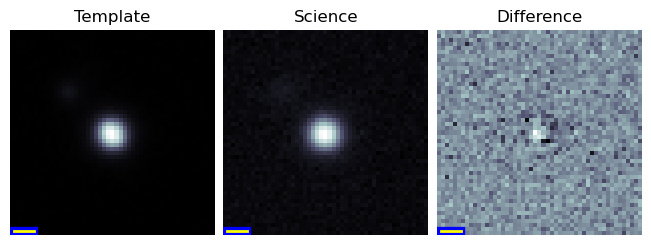

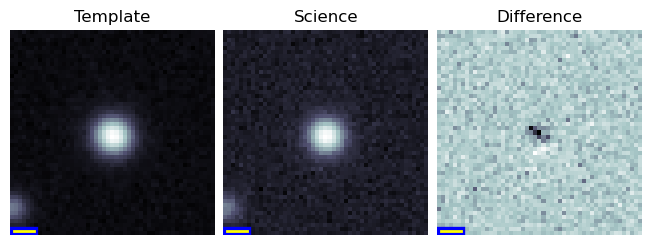

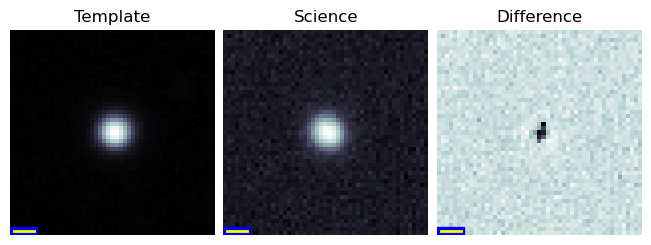

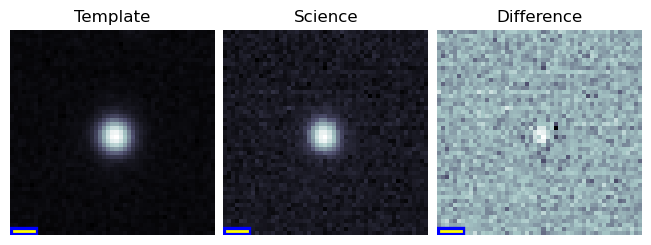

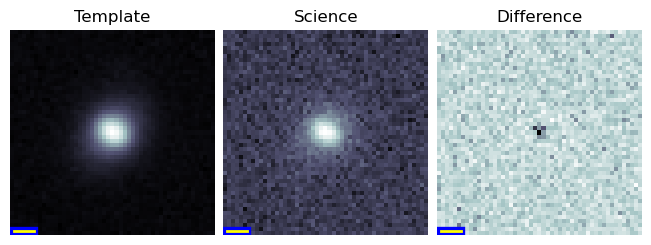

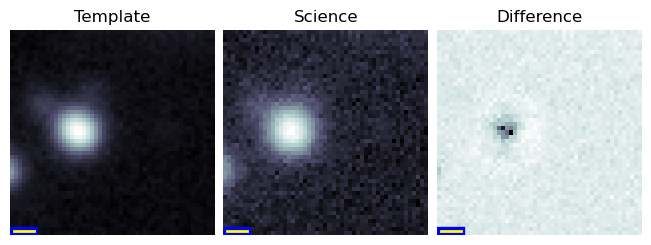

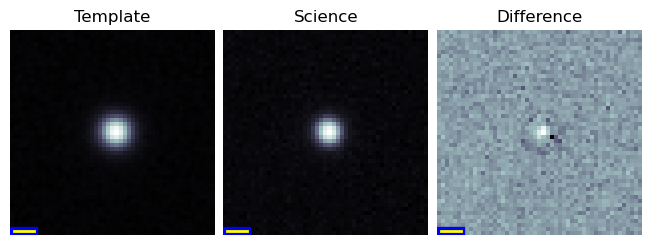

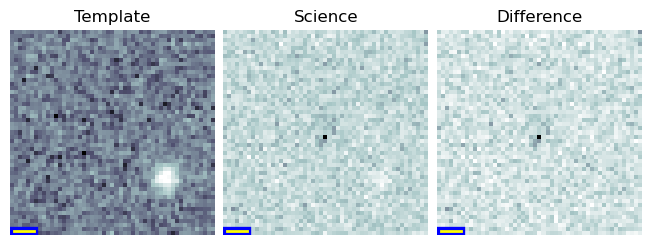

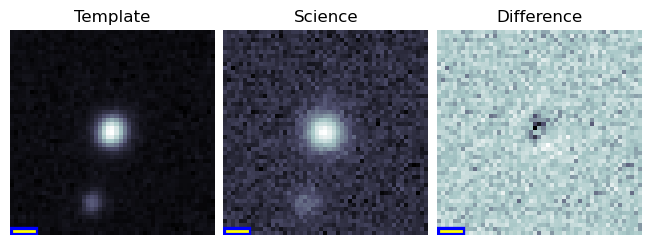

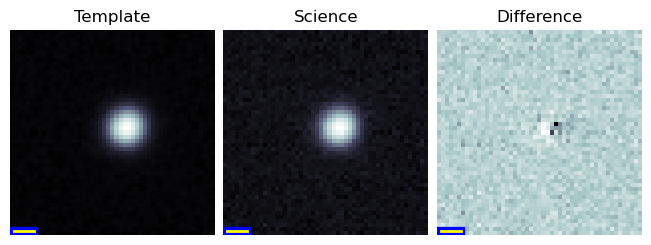

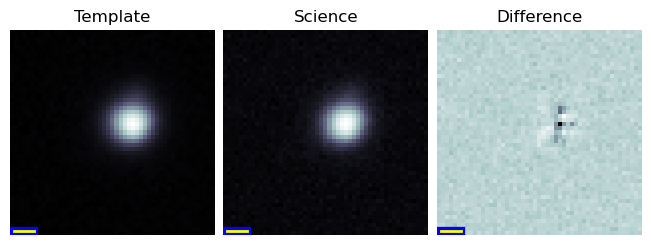

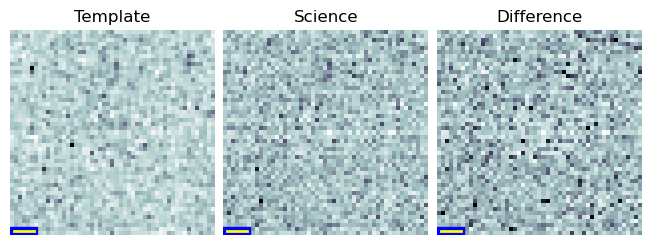

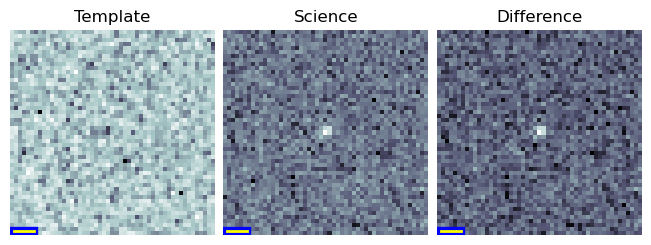

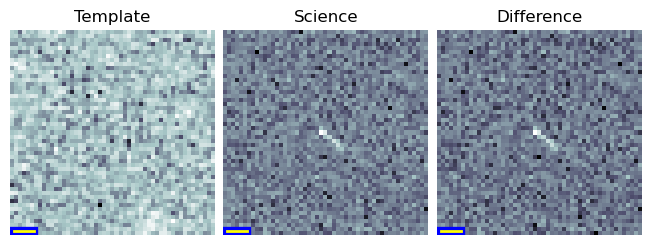

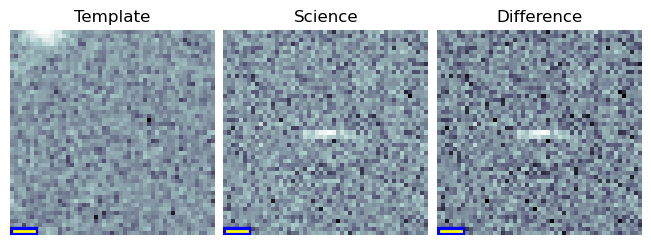

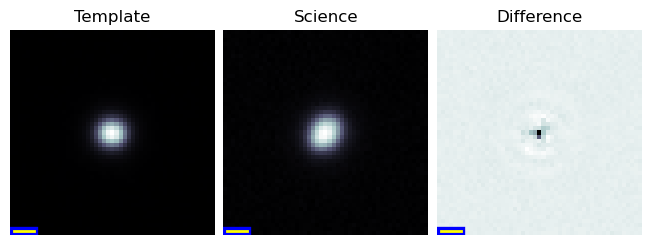

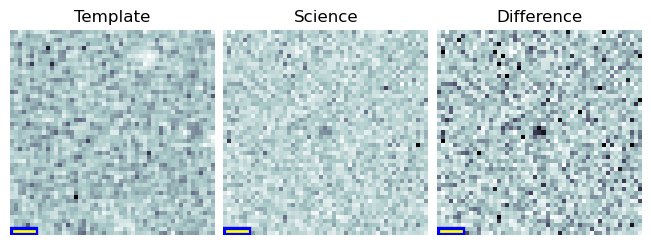

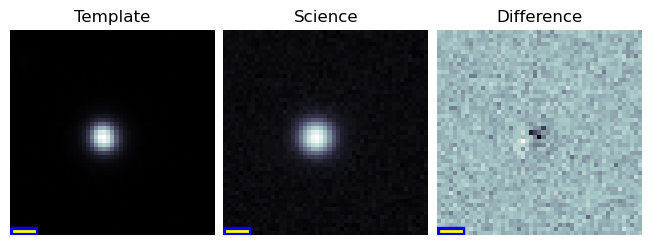

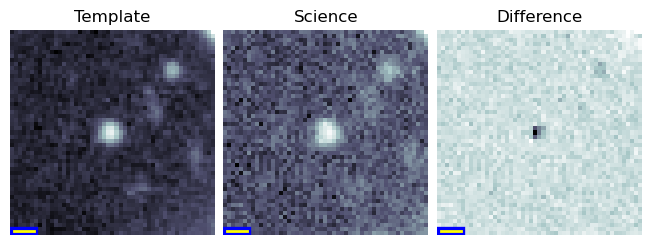

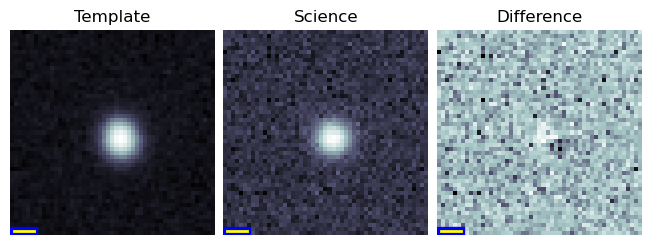

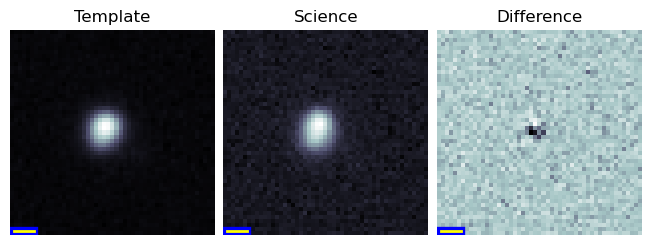

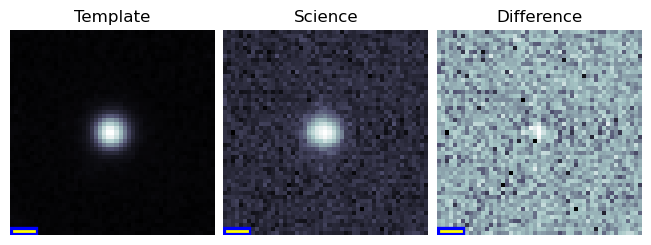

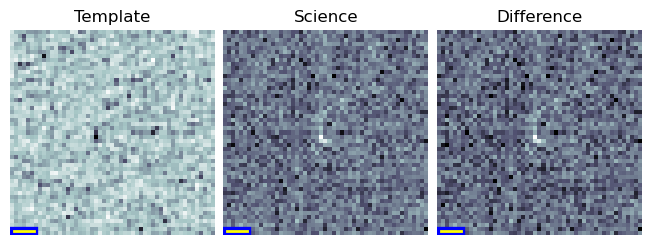

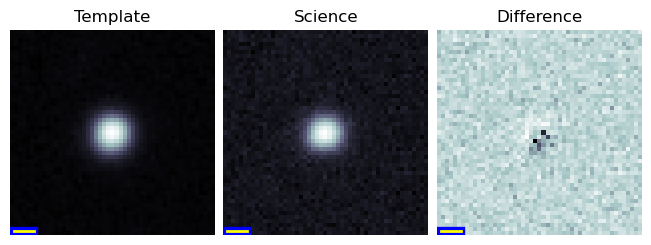

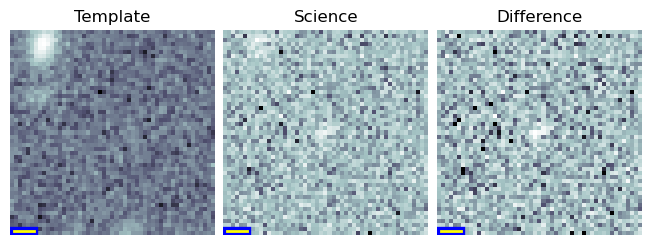

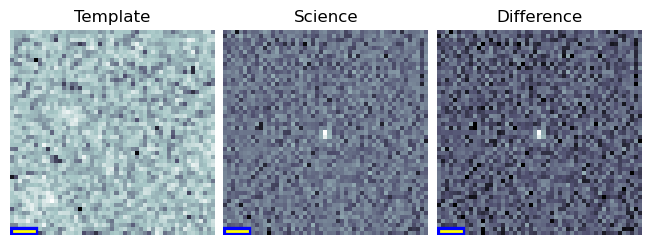

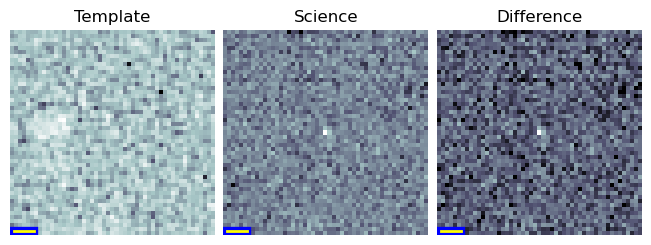

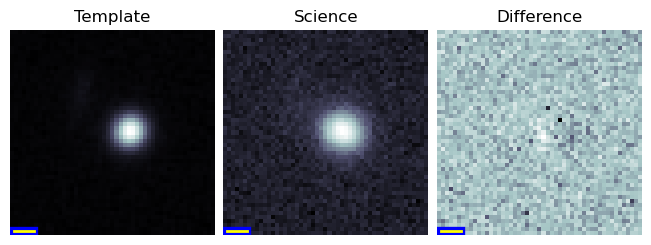

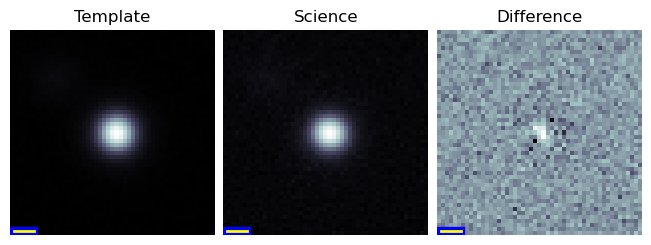

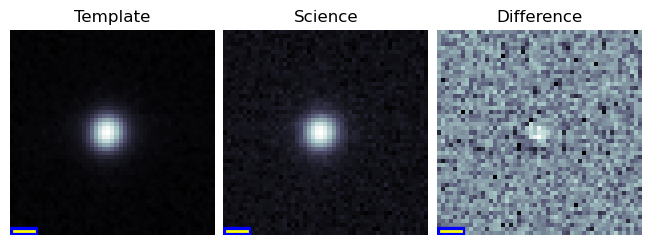

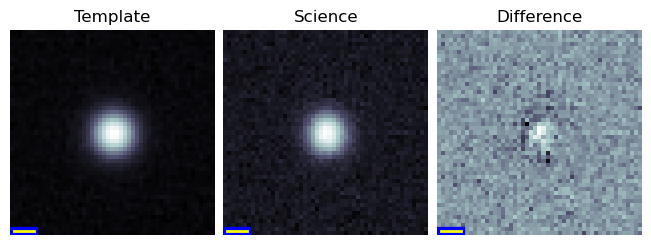

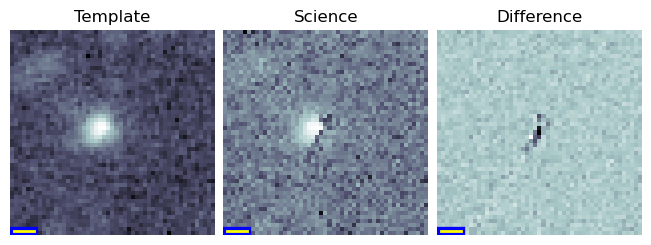

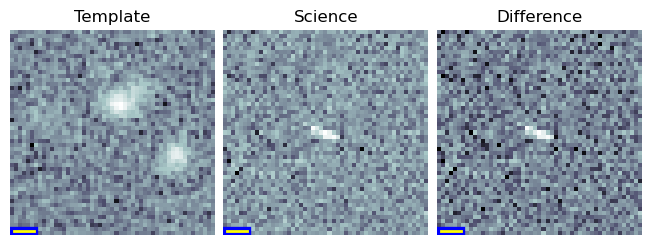

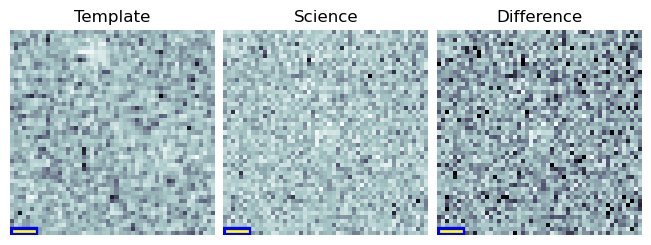

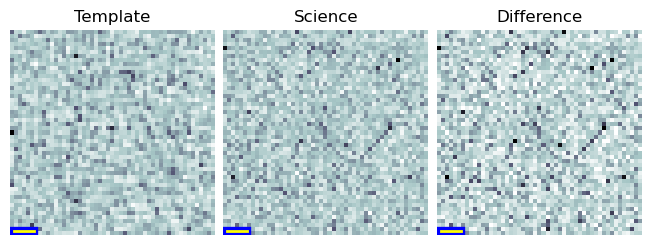

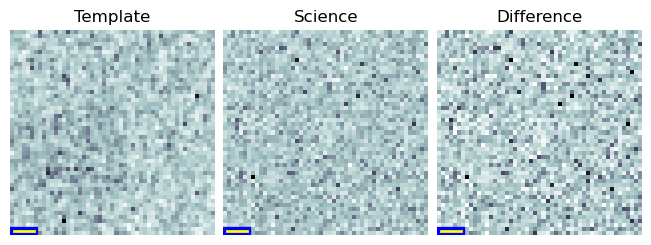

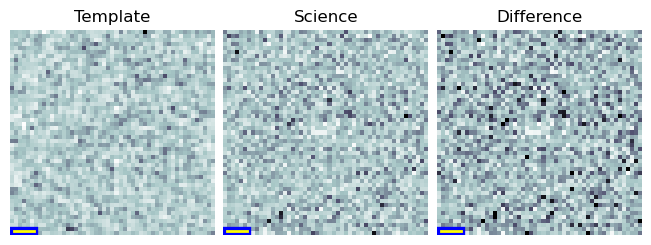

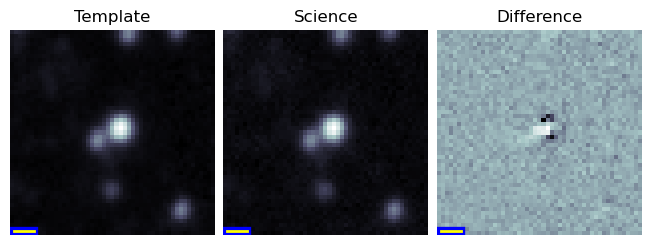

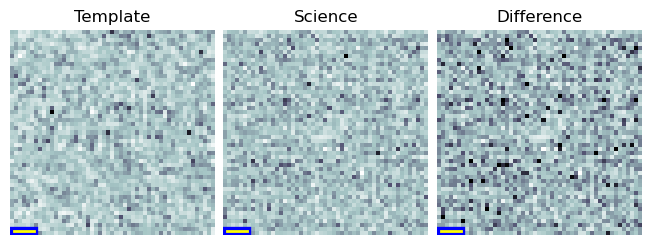

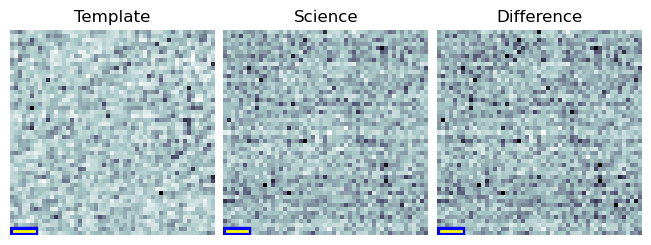

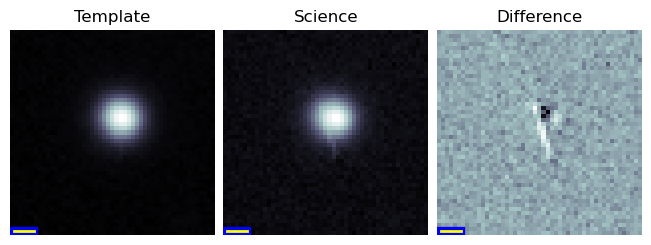

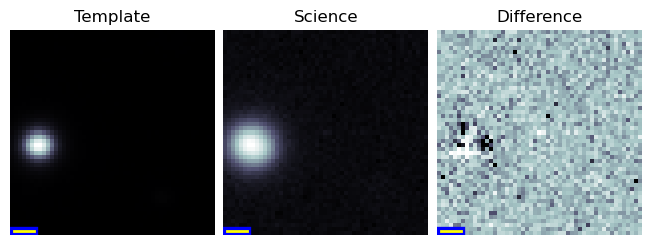

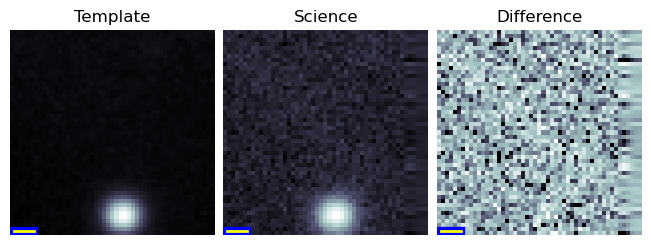

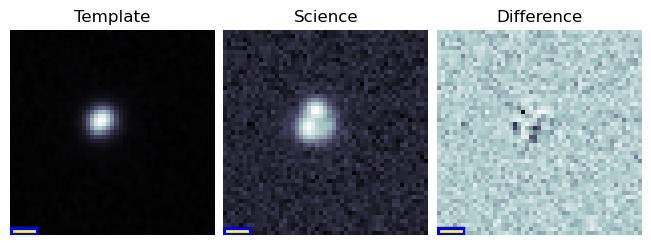

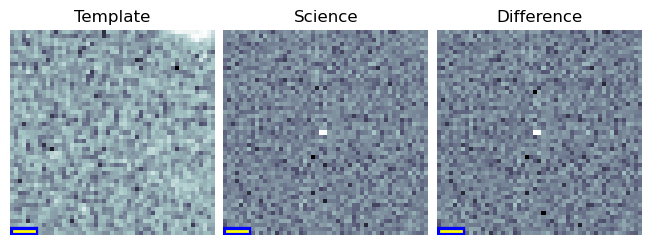

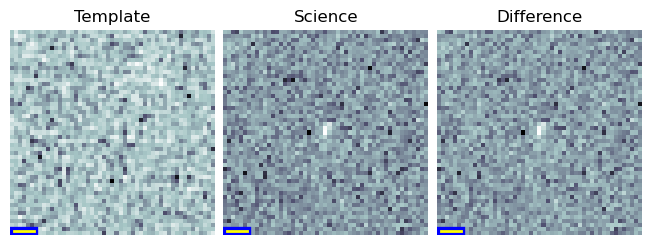

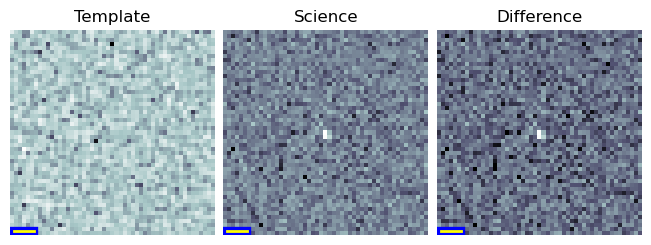

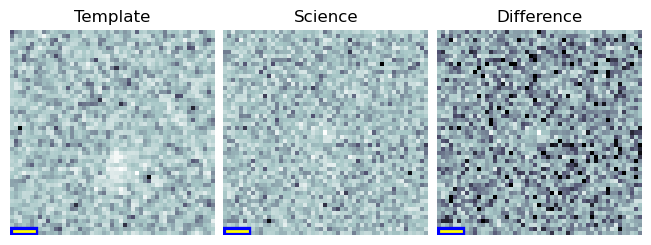

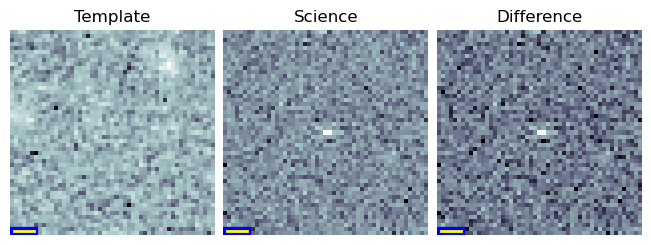

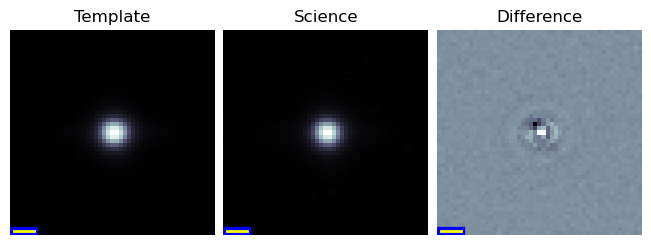

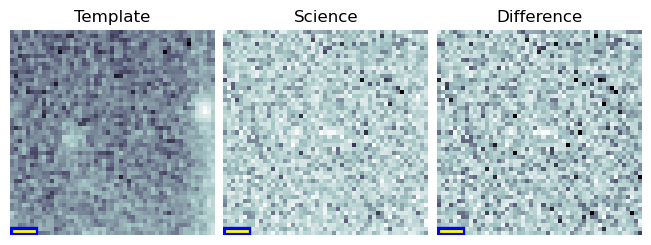

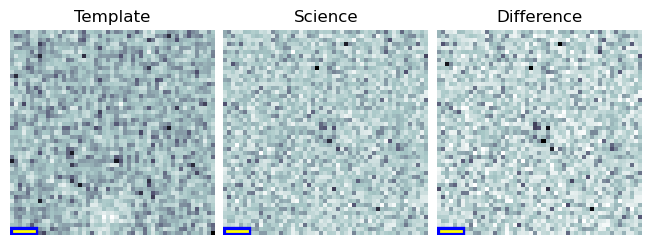

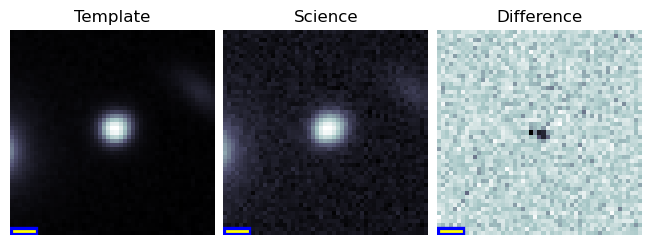

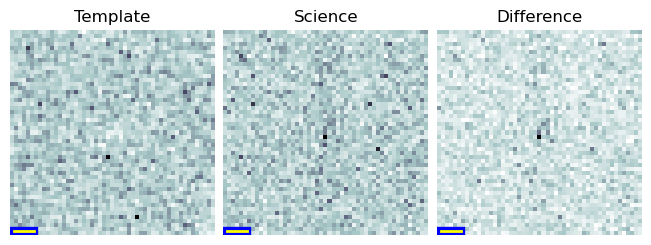

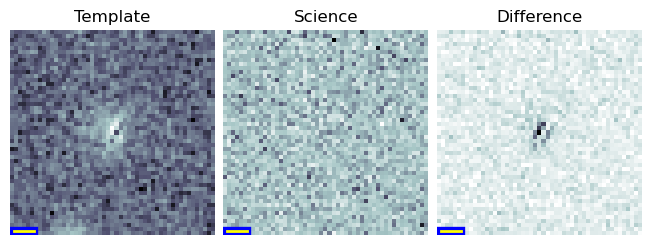

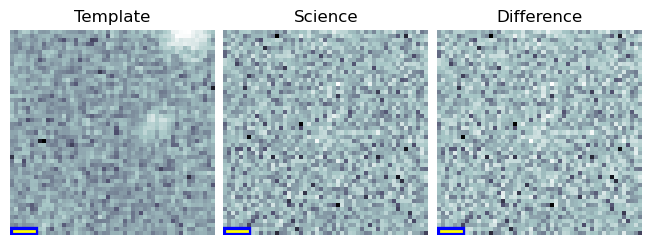

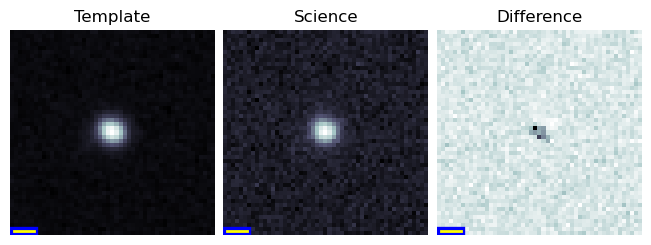

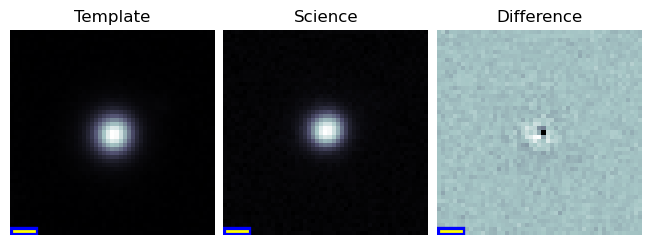

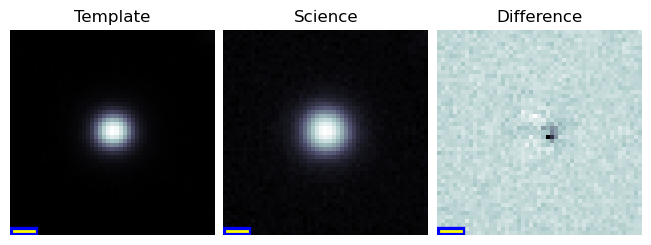

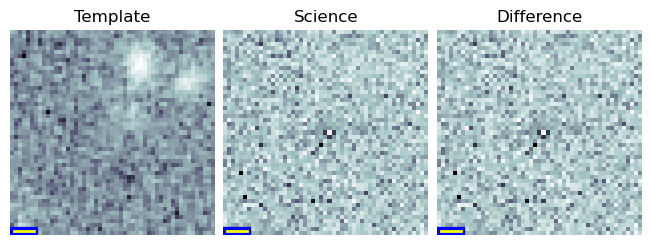

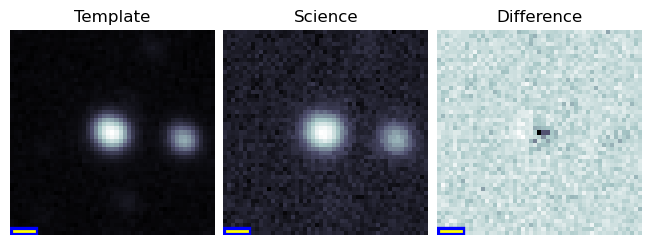

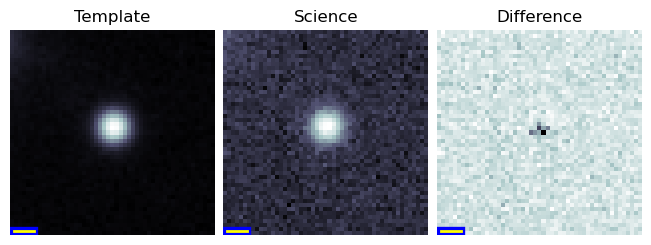

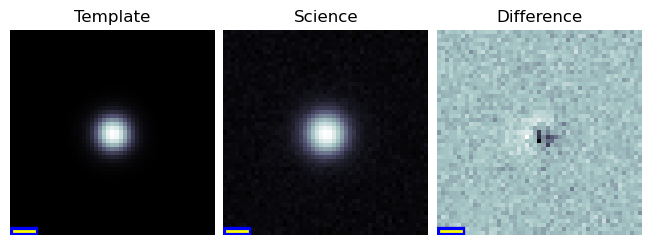

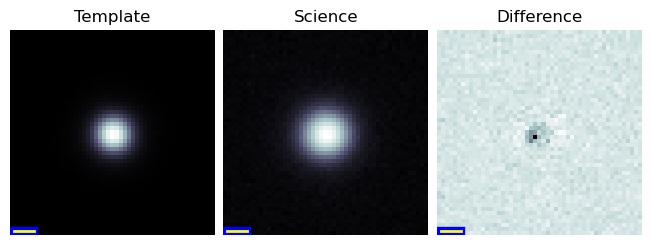

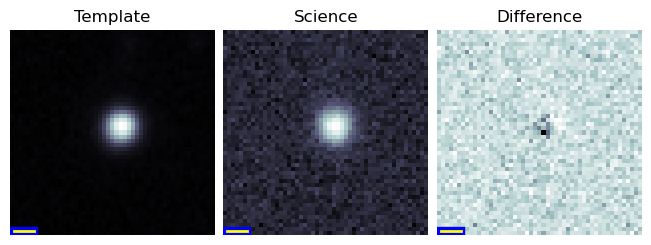

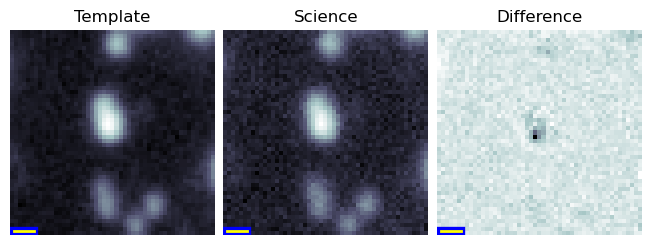

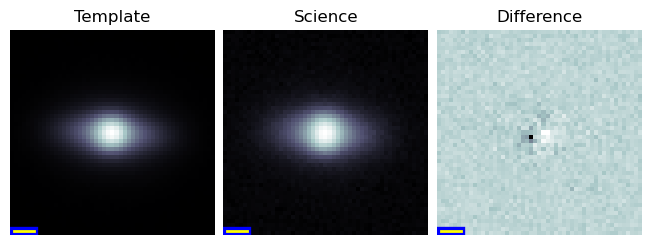

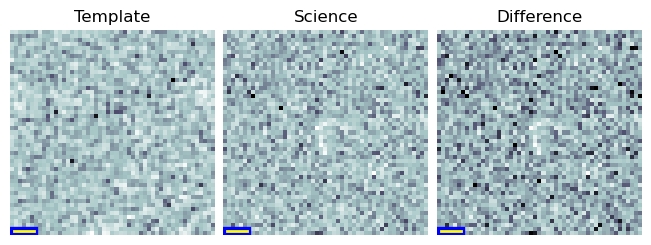

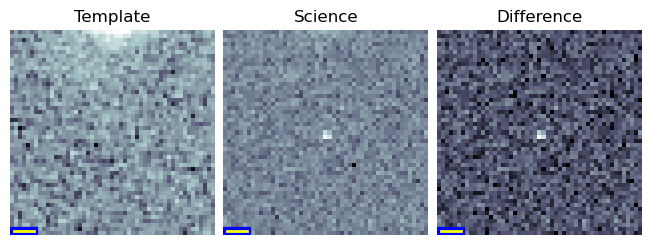

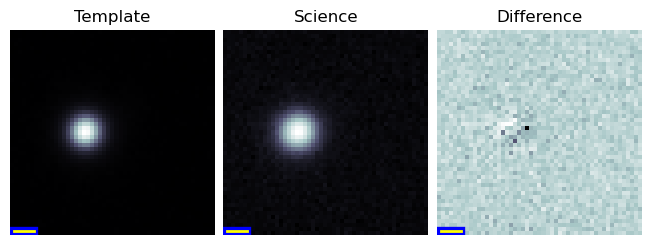

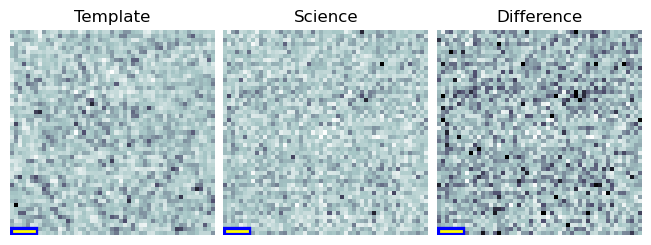

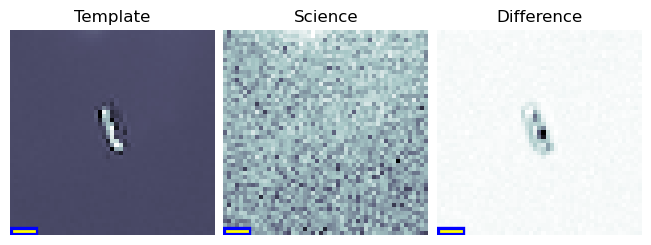

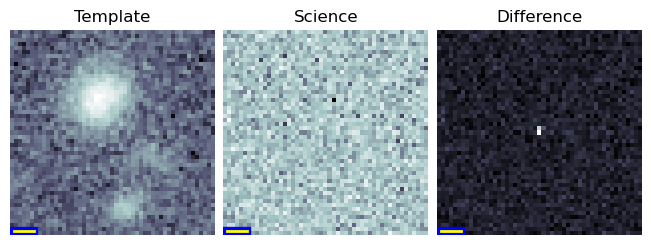

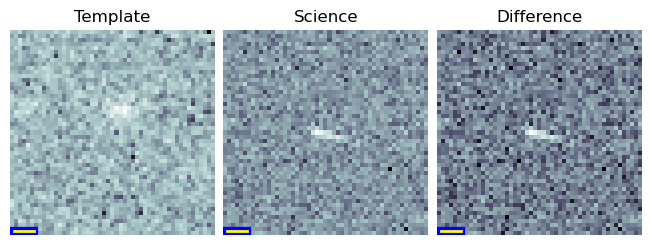

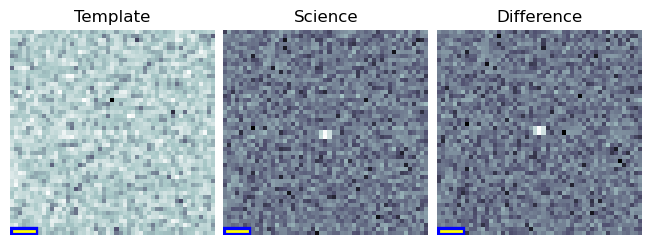

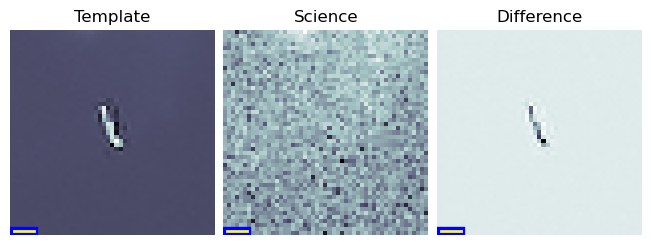

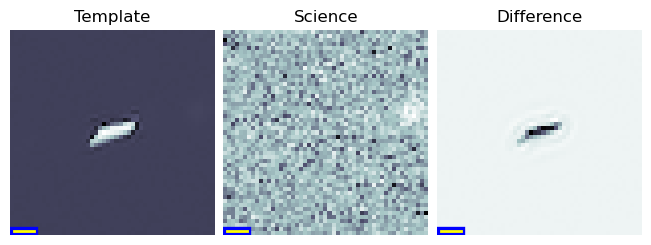

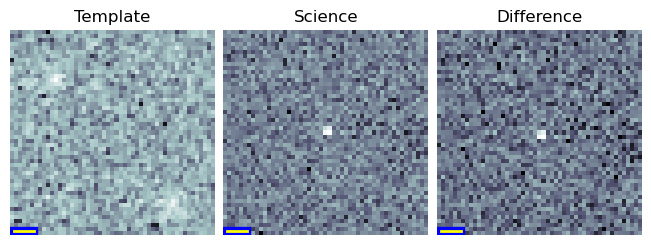

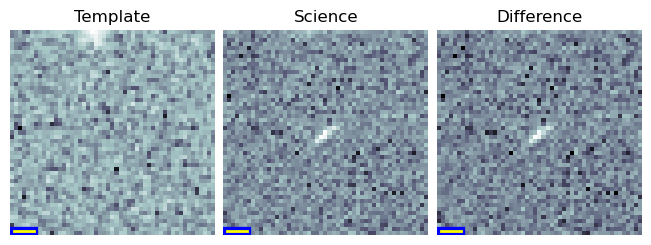

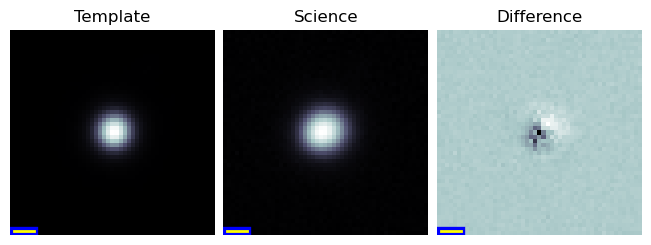

In [76]:
for idx, row in df.loc[w_cosmic].iterrows():
    display(Image(row['local_path']))